In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [5]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
df = df[['Score','Text']]
df

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
...,...,...
568449,5,Great for sesame chicken..this is a good if no...
568450,2,I'm disappointed with the flavor. The chocolat...
568451,5,"These stars are small, so you can give 10-15 o..."
568452,5,These are the BEST treats for training and rew...


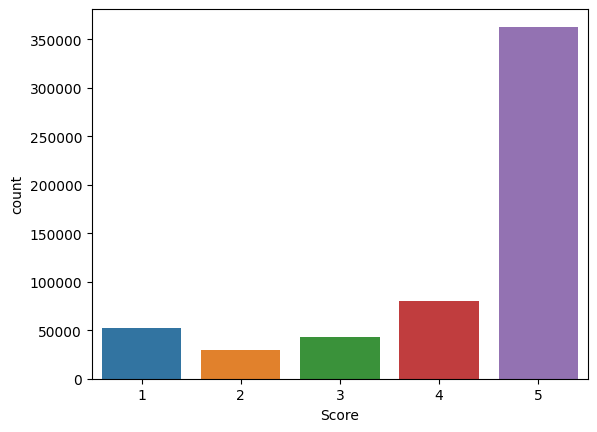

In [9]:
sns.countplot(data=df,x='Score')
plt.show()

In [10]:
condidtions = [
    df.Score >= 4,
    df.Score == 3,
    df.Score <=2,
]
values = ['Positive','Neutral','Negative']

df['Score'] = np.select(condidtions, values)

In [11]:
df

,Score,Text
0,Positive,I have bought several of the Vitality canned d...
1,Negative,Product arrived labeled as Jumbo Salted Peanut...
2,Positive,This is a confection that has been around a fe...
3,Negative,If you are looking for the secret ingredient i...
4,Positive,Great taffy at a great price. There was a wid...
...,...,...
568449,Positive,Great for sesame chicken..this is a good if no...
568450,Negative,I'm disappointed with the flavor. The chocolat...
568451,Positive,"These stars are small, so you can give 10-15 o..."
568452,Positive,These are the BEST treats for training and rew...


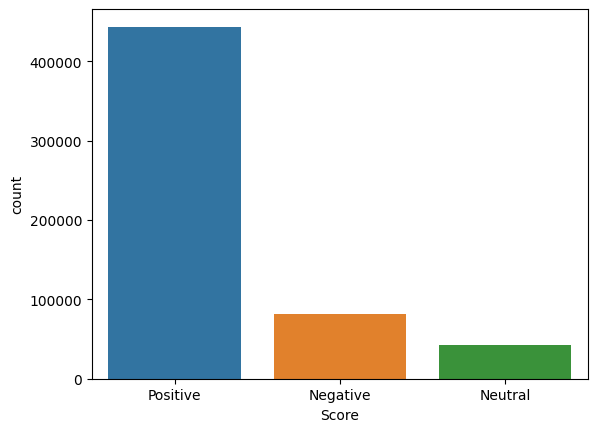

In [12]:
sns.countplot(data=df,x='Score')
plt.show()

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [14]:
from nltk.stem.porter import PorterStemmer
import string
ps = PorterStemmer()

In [15]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [16]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [17]:
df

,Score,Text,transformed_text
0,Positive,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...
1,Negative,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanut peanut a...
2,Positive,This is a confection that has been around a fe...,confect around centuri light pillowi citru gel...
3,Negative,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...
4,Positive,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...
...,...,...,...
568449,Positive,Great for sesame chicken..this is a good if no...,great sesam chicken good better restur eaten h...
568450,Negative,I'm disappointed with the flavor. The chocolat...,disappoint flavor chocol note especi weak milk...
568451,Positive,"These stars are small, so you can give 10-15 o...",star small give one train session tri train do...
568452,Positive,These are the BEST treats for training and rew...,best treat train reward dog good groom lower c...


In [18]:
from wordcloud import WordCloud
wc = WordCloud(width=800,height=400,min_font_size=10,background_color='black')
spam_wc = wc.generate(df[df['Score'] == 'Negative']['transformed_text'].str.cat(sep=""))

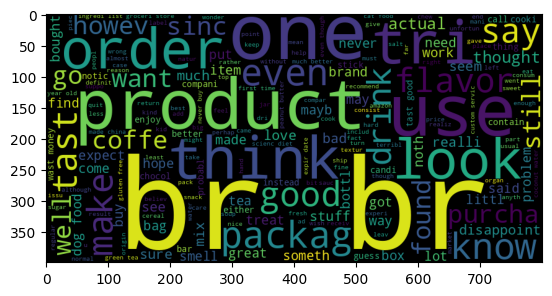

In [19]:
plt.imshow(spam_wc)

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer

2025-05-03 14:09:19.557003: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746281359.747282      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746281359.800442      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [21]:
X = df['transformed_text']
y = df['Score']

In [22]:
tokenizer = Tokenizer(num_words = 5000, oov_token = '<OOV>')
tokenizer.fit_on_texts(df['transformed_text'])
sequences = tokenizer.texts_to_sequences(df['transformed_text'])

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = max(len(x) for x in sequences)
paded_sequences = pad_sequences(sequences, maxlen = max_length, padding='post')

In [24]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['Score'])
labels_categorical = to_categorical(labels)

In [25]:
from tensorflow.keras.layers import Input
input_layer = Input(shape=(max_length,))
embedding = Embedding(input_dim= 5000,output_dim=64)(input_layer)
lstm_layer = LSTM(64)(embedding)
output = Dense(len(label_encoder.classes_),activation='softmax',name='output')(lstm_layer)

I0000 00:00:1746281398.035546      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [26]:
from tensorflow.keras.models import Model
amazon_reviews = Model(inputs=input_layer,outputs=output)
amazon_reviews.compile(
    loss = {'output': 'categorical_crossentropy'},
    optimizer = 'adam',
    metrics = {'output':['accuracy']}
)
amazon_reviews.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1935)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 1935, 64)            │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 353,219 (1.35 MB)

 Trainable params: 353,219 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = amazon_reviews.fit(paded_sequences,labels_categorical,epochs=10,batch_size=512)

Epoch 1/10


I0000 00:00:1746281407.455746      61 cuda_dnn.cc:529] Loaded cuDNN version 90300


1111/1111 ━━━━━━━━━━━━━━━━━━━━ 280s 249ms/step - accuracy: 0.7758 - loss: 0.6761
Epoch 2/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 277s 249ms/step - accuracy: 0.7808 - loss: 0.6668
Epoch 3/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 277s 249ms/step - accuracy: 0.7805 - loss: 0.6675
Epoch 4/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 277s 249ms/step - accuracy: 0.7818 - loss: 0.6650
Epoch 5/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 277s 249ms/step - accuracy: 0.7799 - loss: 0.6685
Epoch 6/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 277s 249ms/step - accuracy: 0.7814 - loss: 0.6655
Epoch 7/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 276s 249ms/step - accuracy: 0.7808 - loss: 0.6669
Epoch 8/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 277s 249ms/step - accuracy: 0.7810 - loss: 0.6664
Epoch 9/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 277s 249ms/step - accuracy: 0.7808 - loss: 0.6667
Epoch 10/10
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 277s 249ms/step - accuracy: 0.7802 - loss: 0.6679


In [28]:
X_final = np.array(paded_sequences)
y_final = np.array(labels_categorical)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final,y_final,test_size=0.2,random_state=42)

In [29]:
y_pred = amazon_reviews.predict(X_test)

3553/3553 ━━━━━━━━━━━━━━━━━━━━ 119s 33ms/step


In [30]:
index_pred = np.argmax(y_pred, axis=1)
index_test = np.argmax(y_test, axis=1)
label_pred = [label_encoder.inverse_transform([index_pred[i]])[0] for i in range(len(index_pred))]
label_test = [label_encoder.inverse_transform([index_test[i]])[0] for i in range(len(index_test))]

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
confusion_matrix = confusion_matrix(label_test, label_pred, labels=label_encoder.classes_)
print('Accuracy Score:', accuracy_score(label_test,label_pred))
print('Classification report:\n', classification_report(label_test,label_pred))

Accuracy Score: 0.7830435126791039
Classification report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00     16181
     Neutral       0.00      0.00      0.00      8485
    Positive       0.78      1.00      0.88     89025

    accuracy                           0.78    113691
   macro avg       0.26      0.33      0.29    113691
weighted avg       0.61      0.78      0.69    113691



In [32]:
amazon_reviews.save('amazon_reviews.h5')

In [33]:
import pickle
import IPython.display
from IPython.display import FileLink
pickle.dump(amazon_reviews,open('amazon_reviews.pkl','wb'))
FileLink('amazon_reviews.h5')

/kaggle/working/amazon_reviews.h5

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Score_Labels'] = le.fit_transform(df['Score'])

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['transformed_text']).toarray()
y = df['Score_labels'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
M = MultinomialNB()
M.fit(X_train,y_train)

In [ ]:
pred = M.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(classification_report(y_test,pred))

In [ ]:
print(confudion_matrix(y_test,pred))